<a href="https://colab.research.google.com/github/YasminForestti/Processo-seletivo-Analytica-2022/blob/main/LGBTQIA%2Bfobia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1)** Importação das bibliotecas e definições de escalas de cores:

In [328]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
import seaborn as sns

In [330]:
colors=["#f94144","#f3722c","#f8961e","#f9c74f","#90be6d","#43aa8b","#577590"]
colors2= ["#577590","#43aa8b","#90be6d","#f9c74f","#f8961e","#f3722c","#f94144"]

In [331]:
brasil = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/brasil.csv")
grupo_lgbtqia = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/grupo_lgbtqia.csv")
Pais = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/pais.csv")
causa_obito_trans = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/causa_obito.csv")

In [332]:
direitos = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/omophobia.csv",encoding='ISO-8859-1',sep=';')

In [333]:
direitos.head()

,COUNTRY,CSSSA LEGAL?,DATE OF DECRIM,MAX PENALTY,CONST.,BROAD PROT.,EMPLOY.,HATE CRIME,INCITEMENT,BAN CONV. THERAPIES,SAME SEX MARRIAGE,CIVIL UNIONS,JOINT ADOPTION,SECOND PARENT ADOPTION
0,Algeria,NO,-,2,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
1,Angola,YES,2021,-,NO,YES,YES,YES,YES,NO,NO,NO,NO,NO
2,Benin,YES,NEVER CRIM,-,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
3,Botswana,YES,2019,-,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO
4,Burkina Faso,YES,NEVER CRIM,-,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO


In [334]:
Pais.head(20)

,ano,pais_ingles,homicidios
0,2008,All regions,148.0
1,2009,All regions,224.0
2,2010,All regions,233.0
3,2011,All regions,271.0
4,2012,All regions,312.0
5,2013,All regions,271.0
6,2014,All regions,294.0
7,2015,All regions,276.0
8,2016,All regions,324.0
9,2017,All regions,358.0


In [335]:
brasil.head()

,ano,homicidios
0,2000,130
1,2001,132
2,2002,126
3,2003,125
4,2004,158


In [336]:
grupo = grupo_lgbtqia
grupo_lgbtqia.head()

,ano,grupo,homicidios,prop_homicidios_total
0,2020,Gay,51.0,NaN
1,2020,Trans ou Travesti,164.0,NaN
2,2020,Travesti,NaN,NaN
3,2020,Lésbica,10.0,NaN
4,2020,Transsexual,NaN,NaN


##**3)** Tratamento da tabela Grupo_lgbtqia

In [337]:
Replace_mapping_dict = {
    'Travesti':'Trans',
    'Transsexual':'Trans',
    'Trans ou Travesti':'Trans'
}

grupo_lgbtqia['grupo']=grupo_lgbtqia['grupo'].replace(Replace_mapping_dict)

In [338]:
filtro =  np.invert(grupo_lgbtqia['homicidios'] >= 0)
grupo_NaN = grupo_lgbtqia[filtro]
grupo_NaN = grupo_NaN.groupby(by = ['grupo','ano']).sum()
grupo_NaN = grupo_NaN.drop(columns = ['homicidios','prop_homicidios_total'])
grupo_NaN

Empty DataFrame
Columns: []
Index: [(Bissexual, 2015), (Gay, 2015), (Lésbica, 2015), (Trans, 2011), (Trans, 2012), (Trans, 2013), (Trans, 2014), (Trans, 2015), (Trans, 2016), (Trans, 2017), (Trans, 2018), (Trans, 2020)]

Text(0.5, 1.0, 'Grupos da comunidade LGBT mortos por ano')

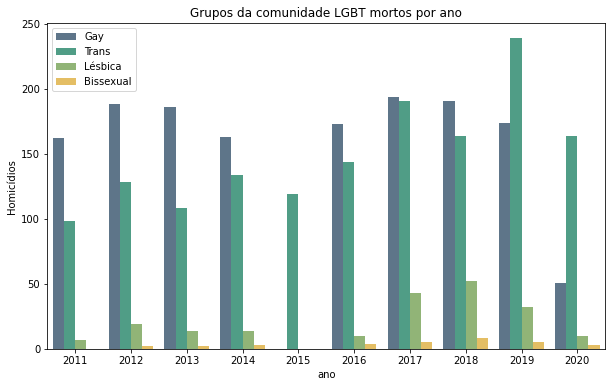

In [339]:
plt.figure(figsize=(10, 6))
plot_abaixo_sm = sns.barplot(x = 'ano',
                             y='homicidios',
                             data=grupo_lgbtqia,
                             hue='grupo', estimator=np.sum, ci=None, palette=colors2)
plt.legend(["Gay","Trans", "Lésbica","Bissexual"])
plt.ylabel("Homicídios")
plt.title("Grupos da comunidade LGBT mortos por ano")

In [340]:
filtro = grupo_lgbtqia['homicidios'] > 0
grupo_lgbtqia = grupo_lgbtqia[filtro]
grupo_soma_homicidios = grupo_lgbtqia.groupby(by = 'grupo').sum()

In [341]:
grupo_soma_homicidios= grupo_soma_homicidios.drop(columns = ['ano','prop_homicidios_total'])
grupo_soma_homicidios

,homicidios
grupo,
Bissexual,32.0
Gay,1482.0
Lésbica,201.0
Trans,1489.0


tabela com o total de homicídios de 2011 a 2020 as 4 grupos.

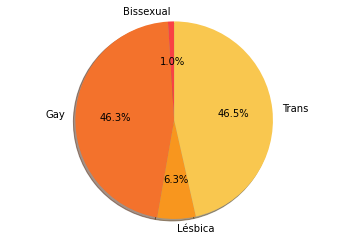

In [342]:
labels = ['Bissexual', 'Gay','Lésbica','Trans']
tam = grupo_soma_homicidios['homicidios'].tolist()
ax = plt.subplot()
ax.pie(tam,labels=labels,autopct = '%1.1f%%',startangle = 90,colors=colors,shadow = True)
ax.axis('equal')
plt.show()

##Análise do mundo


Primeiramente, aqui foi feito a relação total de homicídios de pessoas trans por ano no brasil. Para depois podermos comparar melhor o restante do mundo.

In [343]:
filtro = grupo_lgbtqia['homicidios'] > 0
grupo_lgbtqia = grupo_lgbtqia[filtro]
grupo_soma_homicidios = grupo_lgbtqia.groupby(by = 'grupo').sum()

In [344]:
filtro = grupo_lgbtqia['grupo'] == 'Trans'
grupo_trans_ano = grupo_lgbtqia[filtro]

In [345]:
filtro2 = grupo_trans_ano['ano'] <= 2018	
grupo_trans_ano = grupo_trans_ano[filtro2]

In [346]:
grupo_trans_ano = grupo_trans_ano.groupby(by = ['ano']).sum()
grupo_trans_ano= grupo_trans_ano.drop(columns = 'prop_homicidios_total')

In [347]:
grupo_trans_ano

,homicidios
ano,
2011,98.0
2012,128.0
2013,108.0
2014,134.0
2015,119.0
2016,144.0
2017,191.0
2018,164.0


Na tabela dos "Pais" já tinha a soma de homicídio de pessoas Trans ao ano. Por isso peguei apenas esses dados:

In [348]:
filtro = Pais['pais_ingles'] == 'All regions'	
num_total_mundial = Pais[filtro]
num_total_mundial = num_total_mundial.drop(columns= ['pais_ingles'])
filtro2 = num_total_mundial['ano'] >= 2011	
num_total_mundial = num_total_mundial[filtro2]

num_total_mundial

,ano,homicidios
3,2011,271.0
4,2012,312.0
5,2013,271.0
6,2014,294.0
7,2015,276.0
8,2016,324.0
9,2017,358.0
10,2018,271.0


In [349]:
num_total_mundial.insert(1,"homicidios_brasil",np.array(grupo_trans_ano['homicidios']))
num_total_mundial

,ano,homicidios_brasil,homicidios
3,2011,98.0,271.0
4,2012,128.0,312.0
5,2013,108.0,271.0
6,2014,134.0,294.0
7,2015,119.0,276.0
8,2016,144.0,324.0
9,2017,191.0,358.0
10,2018,164.0,271.0


In [350]:
porcentagem_mortes_brasil = pd.concat([
                          num_total_mundial['ano'],   
                          (num_total_mundial['homicidios_brasil']*100/num_total_mundial['homicidios']),
                                   
],axis =1)
porcentagem_mortes_brasil.columns = ["ano","Homicídio de pessoas Trans no Brasil em Relação ao Mundo (%)"]
porcentagem_mortes_brasil

,ano,Homicídio de pessoas Trans no Brasil em Relação ao Mundo (%)
3,2011,36.162362
4,2012,41.025641
5,2013,39.852399
6,2014,45.578231
7,2015,43.115942
8,2016,44.444444
9,2017,53.351955
10,2018,60.516605


## **4)**Subnotificação de homicídio trans em relação a organização mundiais?

In [351]:
direitos.head()

,COUNTRY,CSSSA LEGAL?,DATE OF DECRIM,MAX PENALTY,CONST.,BROAD PROT.,EMPLOY.,HATE CRIME,INCITEMENT,BAN CONV. THERAPIES,SAME SEX MARRIAGE,CIVIL UNIONS,JOINT ADOPTION,SECOND PARENT ADOPTION
0,Algeria,NO,-,2,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
1,Angola,YES,2021,-,NO,YES,YES,YES,YES,NO,NO,NO,NO,NO
2,Benin,YES,NEVER CRIM,-,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
3,Botswana,YES,2019,-,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO
4,Burkina Faso,YES,NEVER CRIM,-,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO


Agora, como eu quis ver a relação de homicídios de cada país, foi retirado All regions do Dataframe

In [352]:
filtro = Pais['pais_ingles'] != 'All regions'
Pais_homicidio_Trans = Pais[filtro]

In [353]:
Pais_homicidio_Trans

,ano,pais_ingles,homicidios
11,2008,South Africa,1.0
12,2009,South Africa,0.0
13,2010,South Africa,0.0
14,2011,South Africa,0.0
15,2012,South Africa,4.0
...,...,...,...
776,2014,Papua New Guinea,0.0
777,2015,Papua New Guinea,1.0
778,2016,Papua New Guinea,0.0
779,2017,Papua New Guinea,0.0


In [354]:
pais_homicidio_total = Pais.groupby(by = 'pais_ingles').sum().reset_index()
pais_homicidio_total= pais_homicidio_total.drop(columns = ['ano'])

In [355]:
pais_homicidio_total

,pais_ingles,homicidios
0,Afghanistan,1.0
1,Albania,1.0
2,Algeria,1.0
3,All regions,2982.0
4,Argentina,65.0
...,...,...
66,Turkey,51.0
67,UK,10.0
68,USA,212.0
69,Uganda,2.0


In [356]:
filtro = direitos['CSSSA LEGAL?'] == 'NO'
Pais_criminalizado = direitos[filtro]

In [357]:
filtro = direitos['CSSSA LEGAL?'] == 'YES'
Pais_legal = direitos[filtro]

In [358]:
filtro = Pais_legal['DATE OF DECRIM'] != 'NEVER CRIM'
Pais_legal = Pais_legal[filtro]

In [359]:
anos = ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022']
filtro = Pais_legal['DATE OF DECRIM'].isin(anos)
Pais_legal = Pais_legal[filtro]

In [392]:
Pais_legal_cortado = Pais_legal_cortado.rename({'COUNTRY': 'pais_ingles'}, axis = 1)

In [393]:
Pais_legal_cortado

,pais_ingles,DATE OF DECRIM
1,Angola,2021
3,Botswana,2019
7,Cabo Verde,2004
20,Gabon,2020
26,Lesotho,2012
35,Mozambique,2015
40,Sao Tome & Principe,2012
42,Seychelles,2016
58,Belize,2016
76,Nicaragua,2008


In [391]:
Pais_legal_cortado = Pais_legal.drop(columns = ['CSSSA LEGAL?','MAX PENALTY','CONST.','BROAD PROT.','EMPLOY.','HATE CRIME','INCITEMENT','BAN CONV. THERAPIES','SAME SEX MARRIAGE','CIVIL UNIONS','JOINT ADOPTION','SECOND PARENT ADOPTION']) 
Pais_legal_cortado

,COUNTRY,DATE OF DECRIM
1,Angola,2021
3,Botswana,2019
7,Cabo Verde,2004
20,Gabon,2020
26,Lesotho,2012
35,Mozambique,2015
40,Sao Tome & Principe,2012
42,Seychelles,2016
58,Belize,2016
76,Nicaragua,2008


In [361]:
Pais_criminalizado

,COUNTRY,CSSSA LEGAL?,DATE OF DECRIM,MAX PENALTY,CONST.,BROAD PROT.,EMPLOY.,HATE CRIME,INCITEMENT,BAN CONV. THERAPIES,SAME SEX MARRIAGE,CIVIL UNIONS,JOINT ADOPTION,SECOND PARENT ADOPTION
0,Algeria,NO,-,2,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
5,Burundi,NO,-,2,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
6,Cameroon,NO,-,5,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
9,Chad,NO,-,2,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO
10,Comoros,NO,-,5,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Samoa,NO,-,7,NO,NO,YES,YES,NO,LIMITED,NO,NO,NO,NO
189,Solomon Islands,NO,-,14,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
190,Tonga,NO,-,10,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
191,Tuvalu,NO,-,14,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO


In [362]:
np.percentile(pais_homicidio_total['homicidios'],50)

4.0

In [363]:
filtro = pais_homicidio_total['homicidios'] <= np.percentile(pais_homicidio_total['homicidios'],50)
Pais_percentil50 = pais_homicidio_total[filtro]

In [364]:
Pais_percentil50

,pais_ingles,homicidios
0,Afghanistan,1.0
1,Albania,1.0
2,Algeria,1.0
5,Australia,2.0
6,Azerbaijan,4.0
7,Belize,2.0
10,Cambodia,1.0
16,Cuba,3.0
20,Fiji,2.0
22,Georgia,2.0


In [365]:
Pais_percentil50.loc[Pais_percentil50['pais_ingles'].isin(Pais_criminalizado['COUNTRY'])].reset_index(drop=True)

,pais_ingles,homicidios
0,Afghanistan,1.0
1,Algeria,1.0
2,Guyana,4.0
3,Iran,1.0
4,Jamaica,2.0
5,Liberia,1.0
6,Mauritius,1.0
7,Papua New Guinea,1.0
8,Saudi Arabia,2.0
9,Singapore,1.0


In [366]:
paise_percentil50_legal=Pais_percentil50.loc[Pais_percentil50['pais_ingles'].isin(Pais_legal['COUNTRY'])].reset_index(drop=True)

In [367]:
paise_percentil50_legal

,pais_ingles,homicidios
0,Azerbaijan,4.0
1,Belize,2.0
2,Fiji,2.0
3,Georgia,2.0
4,Nepal,2.0
5,Panama,4.0


In [394]:
m = pd.merge(paise_percentil50_legal, Pais_legal_cortado, how = 'inner', on = 'pais_ingles')

In [395]:
m

,pais_ingles,homicidios,DATE OF DECRIM
0,Azerbaijan,4.0,2000
1,Belize,2.0,2016
2,Fiji,2.0,2010
3,Georgia,2.0,2000
4,Nepal,2.0,2007
5,Panama,4.0,2008
